In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
df.dropna(subset=["culmen_length_mm"],inplace=True)

In [6]:
df["sex"] = df["sex"].fillna(df.mode()["sex"][0])

In [7]:
df[df.sex == "."]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [8]:
df["sex"] = ["MALE" if x == '.' else x for x in df["sex"]]

In [9]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [10]:
df_final = pd.concat([df,pd.get_dummies(df["sex"])],axis=1)

In [11]:
df_final.drop("sex",axis=1,inplace=True)

In [12]:
df_final

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


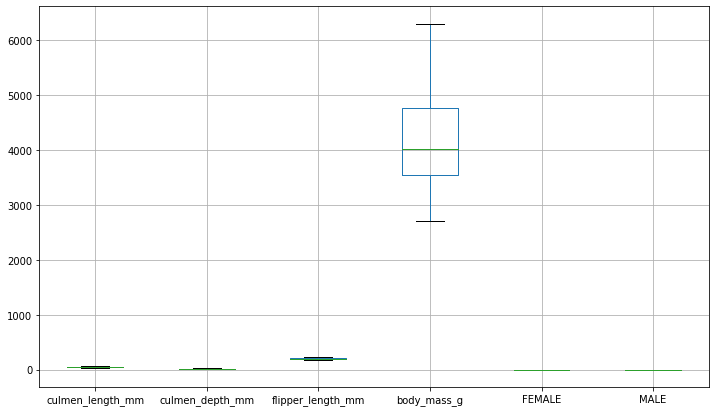

In [32]:
plt.figure(figsize=(12,7))
df_final.boxplot()
plt.show()

In [14]:
df_final = df_final[df_final["flipper_length_mm"]<4000]

In [15]:
df_final = df_final[df_final["flipper_length_mm"] > 0]

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_final),columns=df_final.columns)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(df_scaled)
print(dfx_pca.explained_variance_ratio_)
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(df_scaled)
print(n_components)

[5.16871121e-01 3.43549462e-01 8.73320743e-02 3.48740076e-02
 1.73733346e-02 1.83618068e-32]
2


In [21]:
from sklearn.cluster import KMeans

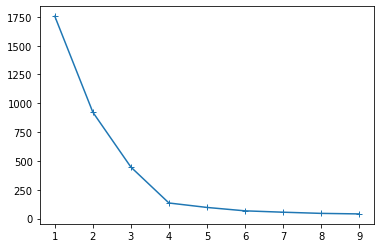

In [22]:
inertia = []
for i in range(1,10):
    k_means = KMeans(n_clusters = i,random_state=42)
    k_means.fit(penguins_PCA)
    inertia.append(k_means.inertia_)
plt.plot(range(1, 10), inertia, marker="+")
plt.show()

In [23]:
k_means = KMeans(n_clusters = 4,random_state=42)
k_means.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

/home/kg/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

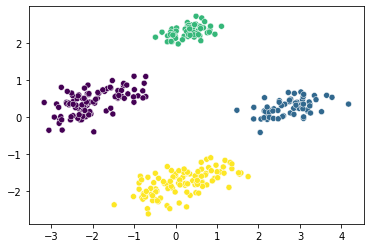

In [29]:
sns.scatterplot(penguins_PCA[:, 0], penguins_PCA[:, 1], c=k_means.labels_)